<a href="https://colab.research.google.com/github/NourhanDeifSayed/Mahcien-Learning-from-scratch/blob/main/Na%C3%AFve_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
#read the file aas a dataframe
titanic = pd.read_csv("titanic_dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#get the shape of the data
titanic.shape

(891, 12)

In [ ]:
#get some staticitcs of out titanic data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#determine the number of nulls in our data
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
##determine the number of duplicates in our data
titanic.duplicated().sum()

0

In [ ]:
##determine the number of survived and un survived people in our data
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<ipython-input-65-fb4aceb4f6bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic, palette='Set2')


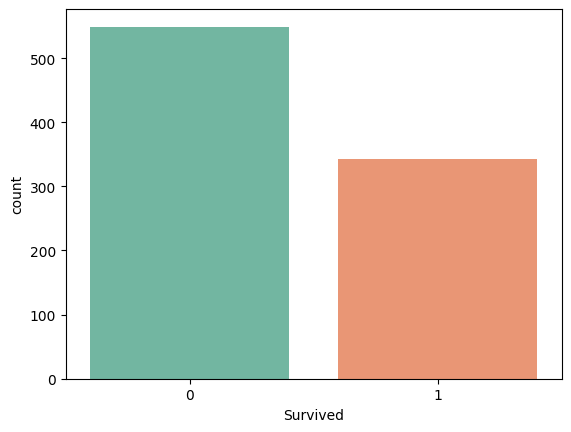

In [ ]:
#plot the number of survived and un survived people in our data
sns.countplot(x='Survived', data=titanic, palette='Set2')
plt.show()

In [ ]:
#Determine the percentage of missing values in cabin column
print('Percent of missing Cabin records is %.2f%%' %((titanic['Cabin'].isnull().sum()/titanic.shape[0])*100))

Percent of missing Cabin records is 77.10%


In [ ]:
#drop the cabin column because it has large number of missing values, and it will affect the classification results.
titanic.drop('Cabin', axis=1, inplace=True)

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<ipython-input-68-5440ef06079b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=titanic, palette='Set2')


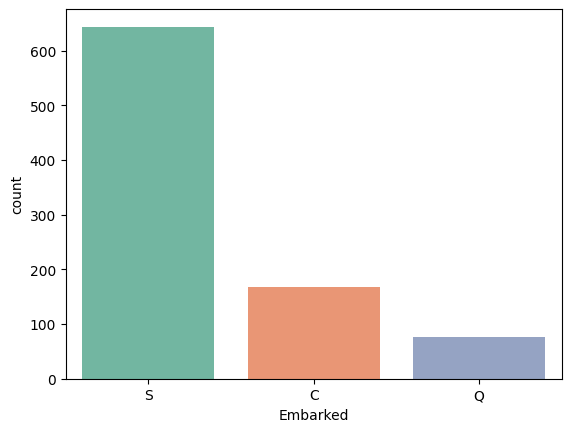

In [ ]:
#plot the Embarked column
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(titanic['Embarked'].value_counts())
sns.countplot(x='Embarked', data=titanic, palette='Set2')
plt.show()

In [ ]:
#fill missing values in embarked column
titanic['Embarked'].fillna('S', inplace=True)
titanic.shape

(891, 11)

In [ ]:
#fill missing values in age column with median
age_median= titanic['Age'].median()
titanic['Age'].fillna(age_median, inplace= True)

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Removal of unimportant columns
titanic.drop(['PassengerId', 'Name'],inplace=True,axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [ ]:
titanic.drop(['Ticket'],inplace=True,axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#encode Pclass',"Embarked", "Sex" columns
titanic=pd.get_dummies(titanic, columns=['Pclass',"Embarked", "Sex"],dtype=int)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [ ]:
#determine the features and labels and splitting the data
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle=True)

In [ ]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [ ]:
#fit the Naive Bayes model on titanic data
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()


gnb.fit(X_train, y_train)


GaussianNB()

In [ ]:
#prdict the output
y_pred = gnb.predict(X_test)

y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0])

In [ ]:
#calculate the accuracy
print('Model accuracy score: ',accuracy_score(y_test, y_pred))

Model accuracy score:  0.7877094972067039


In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[82, 17],
       [21, 59]])

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
persion=precision_score(y_test,y_pred,average='macro')
print("the persion for Logistic MOdel :",persion * 100)


recall=recall_score(y_test,y_pred,average='macro')
print("Recall for Logictic model",recall*100)


F1_score=f1_score(y_test,y_pred,average='macro')
print("F1_score for  Logictic model :",F1_score *100)




the persion for Logistic MOdel : 78.62161471640266
Recall for Logictic model 78.28914141414141
F1_score for  Logictic model : 78.4145722264534


In [ ]:
scores = cross_val_score(gnb,X_train,y_train)

scores

array([0.76223776, 0.74125874, 0.82394366, 0.80985915, 0.78873239])